In [ ]:
import math

def get_area_x_y_value(nodes):
    return math.sqrt(((100**2)/20) * nodes)

print(get_area_x_y_value(10))
print(get_area_x_y_value(20))
print(get_area_x_y_value(30))
print(get_area_x_y_value(40))
print(get_area_x_y_value(50))

In [34]:
from numpy import arange
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('experimentos/quantidade/logs/n40.txt', delimiter='\t',header=None)
substring_to_find = '[WARN: RPL       ]'
data = df[df[2].str.startswith(substring_to_find)]
data[2] = data[2].str.replace('[WARN: RPL       ]', "")
data


/tmp/ipykernel_37016/1462419392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[2] = data[2].str.replace('[WARN: RPL       ]', "")


,0,1,2
378,00:03.687,ID:35,"just joined, no parent yet, setting timer for..."
379,00:03.687,ID:39,"just joined, no parent yet, setting timer for..."
400,00:10.108,ID:39,"found parent: fe80::201:1:1:1, staying in DAG"
401,00:10.287,ID:29,"just joined, no parent yet, setting timer for..."
402,00:10.287,ID:34,"just joined, no parent yet, setting timer for..."
...,...,...,...
2552,07:08.668,ID:6,significant rank update 1875->1071
2553,07:08.668,ID:6,"found parent: fe80::20b:b:b:b, staying in DAG"
2560,07:16.678,ID:7,significant rank update 1734->940
2561,07:16.678,ID:7,"found parent: fe80::205:5:5:5, staying in DAG"


In [122]:
def get_ranking_logs(log_file):
    path = f"experimentos/quantidade/logs/{log_file}"
    df = pd.read_csv(path, delimiter="\t", header=None)
    df.columns = ["time", "id", "message"]
    substring_to_find = "[WARN: RPL       ]"
    data = df[df['message'].str.startswith(substring_to_find)]

    data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
    data['id'] = data['id'].str.replace("ID:","")
    data['id'] = data['id'].astype(int)

    return data[
        data['message'].str.startswith("found parent")
        | data['message'].str.startswith("significant rank update")
    ]

def get_nodes_last_rank_logs(data):
    data['time'] = pd.to_datetime(data['time'], format='%M:%S.%f')
    data = data.sort_values(by='time', ascending=False)
    result = data.groupby('id').head(1)
    result = result.sort_values(by='time')
    result['time'] = result['time'].dt.strftime('%H:%M.%f')

    return result


def last_ranks(log_file):
    data = get_ranking_logs(log_file)
    return get_nodes_last_rank_logs(data)


In [126]:
last_ranks('n10.txt')


/tmp/ipykernel_37016/1288894626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
/tmp/ipykernel_37016/1288894626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data['id'].str.replace("ID:","")
/tmp/ipykernel_37016/1288894626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,time,id,message
106,00:00.688000,7,"found parent: fe80::201:1:1:1, staying in DAG"
111,00:00.388000,8,"found parent: fe80::201:1:1:1, staying in DAG"
112,00:00.498000,10,"found parent: fe80::201:1:1:1, staying in DAG"
123,00:00.088000,9,"found parent: fe80::201:1:1:1, staying in DAG"
137,00:00.968000,5,"found parent: fe80::201:1:1:1, staying in DAG"
140,00:00.308000,3,"found parent: fe80::209:9:9:9, staying in DAG"
145,00:00.808000,4,"found parent: fe80::207:7:7:7, staying in DAG"
148,00:00.018000,6,"found parent: fe80::201:1:1:1, staying in DAG"
153,00:01.138000,2,"found parent: fe80::208:8:8:8, staying in DAG"


In [127]:
last_ranks('n20.txt')

/tmp/ipykernel_37016/1288894626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
/tmp/ipykernel_37016/1288894626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data['id'].str.replace("ID:","")
/tmp/ipykernel_37016/1288894626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,time,id,message
211,00:00.588000,16,"found parent: fe80::201:1:1:1, staying in DAG"
221,00:00.318000,13,"found parent: fe80::201:1:1:1, staying in DAG"
227,00:00.318000,17,"found parent: fe80::201:1:1:1, staying in DAG"
261,00:00.668000,8,"found parent: fe80::20d:d:d:d, staying in DAG"
269,00:00.008000,11,"found parent: fe80::20d:d:d:d, staying in DAG"
276,00:00.648000,9,"found parent: fe80::211:11:11:11, staying in DAG"
290,00:00.188000,20,"found parent: fe80::210:10:10:10, staying in DAG"
292,00:00.358000,14,"found parent: fe80::210:10:10:10, staying in DAG"
295,00:00.988000,15,"found parent: fe80::211:11:11:11, staying in DAG"
299,00:00.008000,12,"found parent: fe80::210:10:10:10, staying in DAG"


In [128]:
last_ranks('n30.txt')


/tmp/ipykernel_37016/1288894626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
/tmp/ipykernel_37016/1288894626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data['id'].str.replace("ID:","")
/tmp/ipykernel_37016/1288894626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,time,id,message
316,00:00.928000,25,"found parent: fe80::201:1:1:1, staying in DAG"
335,00:00.688000,26,"found parent: fe80::201:1:1:1, staying in DAG"
336,00:00.838000,29,"found parent: fe80::201:1:1:1, staying in DAG"
399,00:00.368000,30,"found parent: fe80::201:1:1:1, staying in DAG"
402,00:00.818000,24,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
445,00:00.908000,21,"found parent: fe80::201:1:1:1, staying in DAG"
446,00:00.938000,28,"found parent: fe80::21d:1d:1d:1d, staying in DAG"
471,00:00.738000,16,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
486,00:00.788000,20,"found parent: fe80::21a:1a:1a:1a, staying in DAG"
495,00:00.498000,27,"found parent: fe80::21c:1c:1c:1c, staying in DAG"


In [129]:
last_ranks('n40.txt')

/tmp/ipykernel_37016/1288894626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].str.replace(substring_to_find, "").str.strip()
/tmp/ipykernel_37016/1288894626.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id'] = data['id'].str.replace("ID:","")
/tmp/ipykernel_37016/1288894626.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,time,id,message
2099,00:05.688000,39,"found parent: fe80::201:1:1:1, staying in DAG"
2176,00:05.708000,38,"found parent: fe80::227:27:27:27, staying in DAG"
2185,00:05.638000,36,"found parent: fe80::201:1:1:1, staying in DAG"
2245,00:05.428000,40,"found parent: fe80::227:27:27:27, staying in DAG"
2272,00:05.688000,34,"found parent: fe80::227:27:27:27, staying in DAG"
2290,00:05.687000,28,"found parent: fe80::228:28:28:28, staying in DAG"
2295,00:05.078000,37,"found parent: fe80::224:24:24:24, staying in DAG"
2312,00:05.568000,33,"found parent: fe80::227:27:27:27, staying in DAG"
2331,00:05.717000,22,"found parent: fe80::21c:1c:1c:1c, staying in DAG"
2334,00:05.748000,29,significant rank update 1002->402


# o número de mensagens enviadas por nó

In [2]:
substring_to_find = '[INFO: App       ] SENTCOUNT'
data = df[df[2].str.startswith(substring_to_find)]

sent_messages = data[[0,1]]
sent_messages = sent_messages.rename(columns={0: 'time', 1:"ID"})

sent_messages[['command', 'count']] = data[2].str.split('--', expand=True)
sent_messages['ID'] = sent_messages['ID'].str.replace('ID:', '')
sent_messages = sent_messages[['time',"ID", 'count']]

sent_messages['count'] = sent_messages['count'].astype("Int64")
sent_messages['time'] = pd.to_timedelta('00:' + sent_messages['time']).dt.total_seconds()


# data
sent_messages

,time,ID,count
232,19.980,4,1
238,20.607,2,1
259,23.020,12,1
270,24.807,15,1
278,25.140,3,1
...,...,...,...
11342,1007.521,6,98
11345,1007.549,14,98
11357,1008.267,17,95
11363,1008.874,3,99


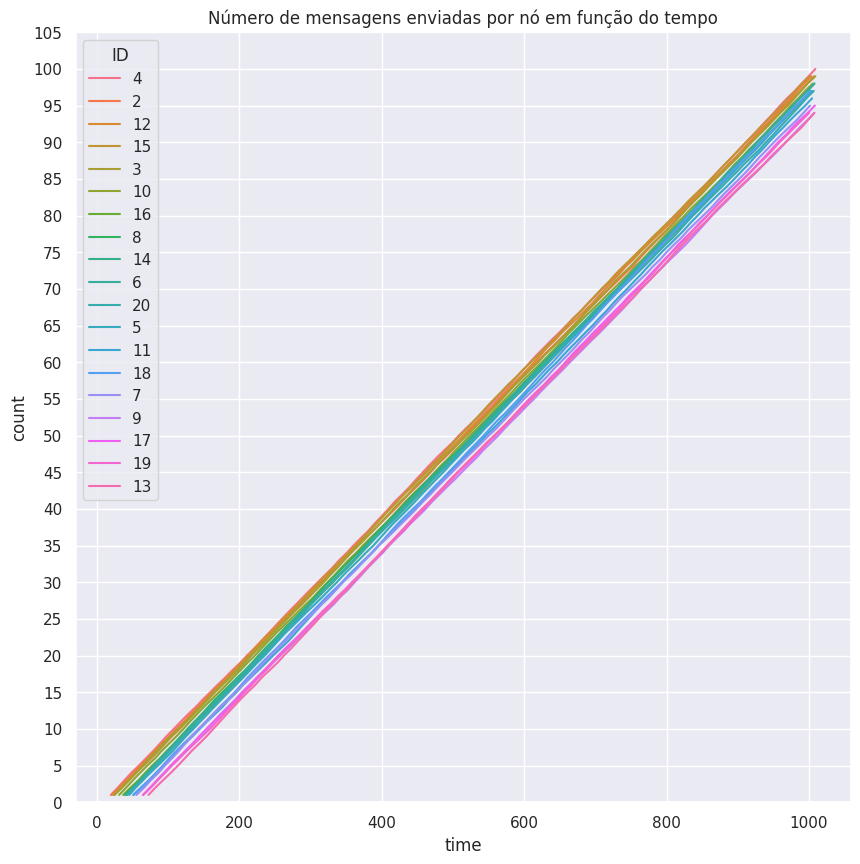

In [3]:
linePlot(
    sent_messages,
    x="time",
    y="count",
    y_range=[0, 101],
    color="ID",
    y_tick_interval=5,
    markers=None,
    figsize=(10, 10),
    title="Número de mensagens enviadas por nó em função do tempo",
)

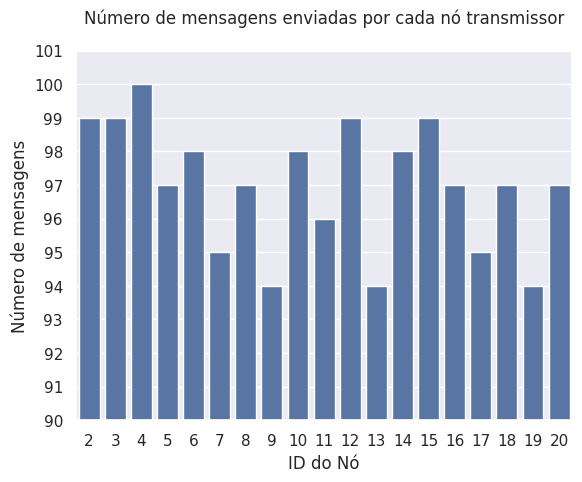

In [4]:
sent_messages['ID'] = sent_messages['ID'].astype("Int64")

max_values = sent_messages.groupby("ID")["count"].max()
max_values = max_values.reset_index()
max_values.columns = ["ID do Nó", "Número de mensagens"]

barplot(max_values, x="ID do Nó", y="Número de mensagens", y_range=[90, 101], y_tick_interval=1, title="Número de mensagens enviadas por cada nó transmissor")

# o número total de mensagens enviadas


In [5]:
new_row = pd.Series(
    {
        "ID do Nó": "Total",
        "Número de mensagens": max_values["Número de mensagens"].sum(),
    }
)
max_values["ID do Nó"] = max_values["ID do Nó"].astype(str)
max_values = pd.concat([max_values, new_row.to_frame().T], ignore_index=True)
max_values

,ID do Nó,Número de mensagens
0,2,99
1,3,99
2,4,100
3,5,97
4,6,98
5,7,95
6,8,97
7,9,94
8,10,98
9,11,96


# o número de mensagens recebidas pelo nó destino em relação a cada nó transmissor

In [6]:
substring_to_find = 'NODECOUNT'
data = df[df[2].str.startswith(substring_to_find)]

recieved_messages_count = data[[0,1]]
recieved_messages_count = recieved_messages_count.rename(columns={0: 'time'})

recieved_messages_count[['command', 'node', 'count']] = data[2].str.split('--', expand=True)
recieved_messages_count = recieved_messages_count[['time','node', 'count']]

recieved_messages_count['time'] = pd.to_timedelta('00:' + recieved_messages_count['time']).dt.total_seconds()
recieved_messages_count['count'] = recieved_messages_count['count'].astype("Int64")
recieved_messages_count

,time,node,count
235,20.007,fd00::204:4:4:4,1
241,20.637,fd00::202:2:2:2,1
262,23.037,fd00::20c:c:c:c,1
274,24.927,fd00::20f:f:f:f,1
281,25.167,fd00::203:3:3:3,1
...,...,...,...
11351,1007.937,fd00::209:9:9:9,94
11354,1007.967,fd00::20e:e:e:e,98
11360,1008.327,fd00::211:11:11:11,95
11366,1008.897,fd00::203:3:3:3,99


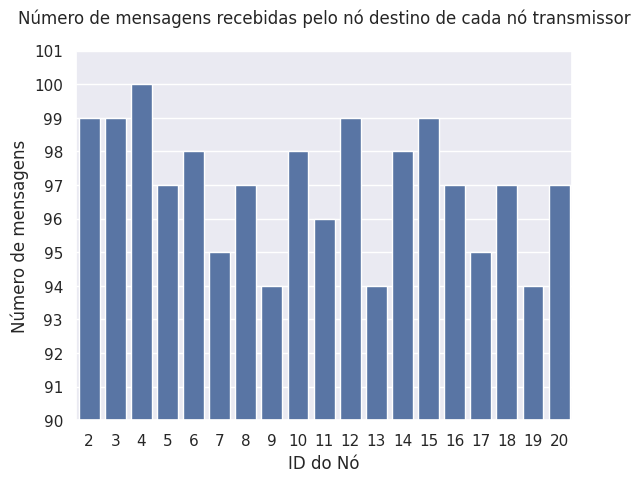

In [7]:


max_values = recieved_messages_count.groupby("node")["count"].max()
max_values = max_values.reset_index()

nodes_ip_id_map = {
    "fd00::202:2:2:2": 2,
    "fd00::203:3:3:3": 3,
    "fd00::204:4:4:4": 4,
    "fd00::205:5:5:5": 5,
    "fd00::206:6:6:6": 6,
    "fd00::207:7:7:7": 7,
    "fd00::208:8:8:8": 8,
    "fd00::209:9:9:9": 9,
    "fd00::20a:a:a:a": 10,
    "fd00::20b:b:b:b": 11,
    "fd00::20c:c:c:c": 12,
    "fd00::20d:d:d:d": 13,
    "fd00::20e:e:e:e": 14,
    "fd00::20f:f:f:f": 15,
    "fd00::210:10:10:10": 16,
    "fd00::211:11:11:11": 17,
    "fd00::212:12:12:12": 18,
    "fd00::213:13:13:13": 19,
    "fd00::214:14:14:14": 20
}
max_values['node'] = max_values['node'].map(nodes_ip_id_map)



max_values.columns = ["ID do Nó", "Número de mensagens"]

barplot(max_values, x="ID do Nó", y="Número de mensagens", y_range=[90, 101], y_tick_interval=1, title="Número de mensagens recebidas pelo nó destino de cada nó transmissor")

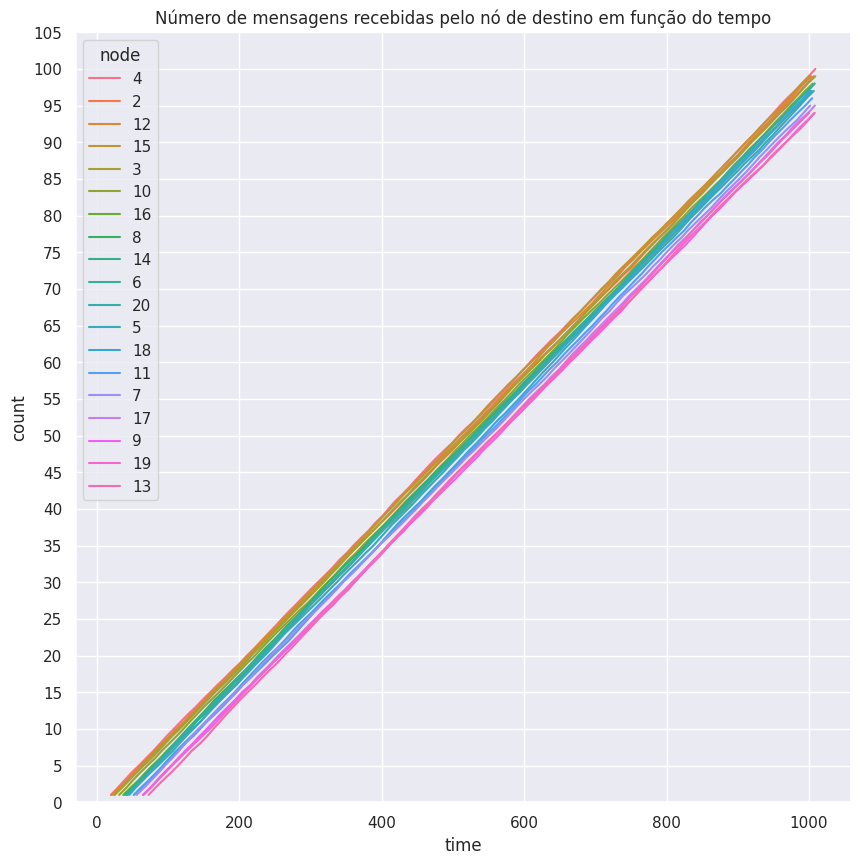

In [8]:
nodes_ip_id_map = {
    "fd00::202:2:2:2": '2',
    "fd00::203:3:3:3": '3',
    "fd00::204:4:4:4": '4',
    "fd00::205:5:5:5": '5',
    "fd00::206:6:6:6": '6',
    "fd00::207:7:7:7": '7',
    "fd00::208:8:8:8": '8',
    "fd00::209:9:9:9": '9',
    "fd00::20a:a:a:a": '10',
    "fd00::20b:b:b:b": '11',
    "fd00::20c:c:c:c": '12',
    "fd00::20d:d:d:d": '13',
    "fd00::20e:e:e:e": '14',
    "fd00::20f:f:f:f": '15',
    "fd00::210:10:10:10": '16',
    "fd00::211:11:11:11": '17',
    "fd00::212:12:12:12": '18',
    "fd00::213:13:13:13": '19',
    "fd00::214:14:14:14": '20'
}
recieved_messages_count['node'] = recieved_messages_count['node'].map(nodes_ip_id_map)

linePlot(
    recieved_messages_count,
    x="time",
    y="count",
    y_range=[0, 101],
    color="node",
    y_tick_interval=5,
    markers=None,
    figsize=(10, 10),
    title="Número de mensagens recebidas pelo nó de destino em função do tempo",
)

# o número total de mensagens recebidas pelo nó destino.

In [9]:
new_row = pd.Series(
    {
        "ID do Nó": "Total",
        "Número de mensagens": max_values["Número de mensagens"].sum(),
    }
)
max_values["ID do Nó"] = max_values["ID do Nó"].astype(str)
max_values = pd.concat([max_values, new_row.to_frame().T], ignore_index=True)
max_values

,ID do Nó,Número de mensagens
0,2,99
1,3,99
2,4,100
3,5,97
4,6,98
5,7,95
6,8,97
7,9,94
8,10,98
9,11,96
